In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

import warnings
warnings.filterwarnings("ignore")

## This dataframe gives us the stats for each player in every game

In [2]:
gamedetails = pd.read_csv('games_details.csv')
gamedetails.head()

GAME_ID     TEAM_ID TEAM_ABBREVIATION   TEAM_CITY  PLAYER_ID  \
0  42000102  1610612764               WAS  Washington     203078   
1  42000102  1610612764               WAS  Washington    1629060   
2  42000102  1610612764               WAS  Washington     203458   
3  42000102  1610612764               WAS  Washington     203526   
4  42000102  1610612764               WAS  Washington     201566   

         PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  OREB  DREB  \
0       Bradley Beal              F     NaN  34:36  14.0  ...   0.0   4.0   
1      Rui Hachimura              F     NaN  25:50   4.0  ...   2.0   5.0   
2           Alex Len              C     NaN  12:11   3.0  ...   3.0   2.0   
3          Raul Neto              G     NaN  19:19   2.0  ...   1.0   2.0   
4  Russell Westbrook              G     NaN  29:07   2.0  ...   2.0   4.0   

   REB   AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
0  4.0   3.0  1.0  0.0  1.0  0.0  33.0       -22.0  
1  7.0   1.0  0.0  0.0  3.0  4.0  11.0        -6.0  
2  5.0   0.0  1.0  0.0  0.0  2.0   6.0       -11.0  
3  3.0   1.0  0.0  0.0  0.0  2.0   4.0       -17.0  
4  6.0  11.0  0.0  0.0  4.0  0.0  10.0       -16.0  

[5 rows x 28 columns]

In [3]:
gamedetails.shape

(615626, 28)

In [4]:
gamedetails.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

In [5]:
gamedetails.COMMENT.value_counts()

DNP - Coach's Decision                      49868
DNP - Coach's Decision                      30547
DND - Injury/Illness                         1267
DNP - Injury/Illness                         1151
DNP - Injury/Illness                          519
                                            ...  
DNP - sore left hamstring                       1
NWT - Left medial tibia bone bruise             1
DND - right quad contusion                      1
DND - Sprained Right Second Toe                 1
NWT - Facial Fracture                           1
Name: COMMENT, Length: 5342, dtype: int64

## This dataframe gives us the results of each game and the home/away stats
### Our target variable is here: HOME_TEAM_WINS
Will need to consider renaming

In [6]:
games = pd.read_csv('games.csv')
games.head()

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2021-05-26  42000102            Final    1610612755       1610612764   
1    2021-05-26  42000132            Final    1610612752       1610612737   
2    2021-05-26  42000142            Final    1610612762       1610612763   
3    2021-05-25  42000112            Final    1610612751       1610612738   
4    2021-05-25  42000152            Final    1610612756       1610612747   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2020    1610612755     120.0        0.557        0.684  ...      26.0   
1    2020    1610612752     101.0        0.383        0.739  ...      15.0   
2    2020    1610612762     141.0        0.544        0.774  ...      28.0   
3    2020    1610612751     130.0        0.523        0.955  ...      31.0   
4    2020    1610612756     102.0        0.465        0.933  ...      21.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  \
0      45.0    1610612764      95.0        0.402        0.633         0.091   
1      54.0    1610612737      92.0        0.369        0.818         0.273   
2      42.0    1610612763     129.0        0.541        0.763         0.348   
3      46.0    1610612738     108.0        0.424        0.783         0.353   
4      31.0    1610612747     109.0        0.450        0.871         0.303   

   AST_away  REB_away  HOME_TEAM_WINS  
0      22.0      40.0               1  
1      17.0      41.0               1  
2      20.0      33.0               1  
3      23.0      43.0               1  
4      24.0      39.0               0  

[5 rows x 21 columns]

In [7]:
# Dropping HOME_TEAM_ID and VISITOR_TEAM_ID since their numbers are the same as
# TEAM_ID_home and TEAM_ID_away
games.drop(columns = ['HOME_TEAM_ID','VISITOR_TEAM_ID'], inplace=True)

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24677 entries, 0 to 24676
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     24677 non-null  object 
 1   GAME_ID           24677 non-null  int64  
 2   GAME_STATUS_TEXT  24677 non-null  object 
 3   SEASON            24677 non-null  int64  
 4   TEAM_ID_home      24677 non-null  int64  
 5   PTS_home          24578 non-null  float64
 6   FG_PCT_home       24578 non-null  float64
 7   FT_PCT_home       24578 non-null  float64
 8   FG3_PCT_home      24578 non-null  float64
 9   AST_home          24578 non-null  float64
 10  REB_home          24578 non-null  float64
 11  TEAM_ID_away      24677 non-null  int64  
 12  PTS_away          24578 non-null  float64
 13  FG_PCT_away       24578 non-null  float64
 14  FT_PCT_away       24578 non-null  float64
 15  FG3_PCT_away      24578 non-null  float64
 16  AST_away          24578 non-null  float6

In [9]:
games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'SEASON',
       'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS'],
      dtype='object')

#### Changing Game_Date_EST to datetime

In [10]:
games['GAME_DATE_EST']= pd.to_datetime(games['GAME_DATE_EST'])
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24677 entries, 0 to 24676
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     24677 non-null  datetime64[ns]
 1   GAME_ID           24677 non-null  int64         
 2   GAME_STATUS_TEXT  24677 non-null  object        
 3   SEASON            24677 non-null  int64         
 4   TEAM_ID_home      24677 non-null  int64         
 5   PTS_home          24578 non-null  float64       
 6   FG_PCT_home       24578 non-null  float64       
 7   FT_PCT_home       24578 non-null  float64       
 8   FG3_PCT_home      24578 non-null  float64       
 9   AST_home          24578 non-null  float64       
 10  REB_home          24578 non-null  float64       
 11  TEAM_ID_away      24677 non-null  int64         
 12  PTS_away          24578 non-null  float64       
 13  FG_PCT_away       24578 non-null  float64       
 14  FT_PCT_away       2457

#### Home Team Winning Percentage

In [11]:
print("Home team win percentage = ",round(games.HOME_TEAM_WINS.mean()*100),"%")

Home team win percentage =  59 %


In [12]:
# We can drop this column
games.GAME_STATUS_TEXT.value_counts()

Final    24677
Name: GAME_STATUS_TEXT, dtype: int64

In [13]:
games.drop(columns = 'GAME_STATUS_TEXT', inplace=True)
games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home',
       'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away',
       'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [14]:
# checking for nulls
games.isnull().any()

GAME_DATE_EST     False
GAME_ID           False
SEASON            False
TEAM_ID_home      False
PTS_home           True
FG_PCT_home        True
FT_PCT_home        True
FG3_PCT_home       True
AST_home           True
REB_home           True
TEAM_ID_away      False
PTS_away           True
FG_PCT_away        True
FT_PCT_away        True
FG3_PCT_away       True
AST_away           True
REB_away           True
HOME_TEAM_WINS    False
dtype: bool

In [15]:
# This tells us the null values for these games are in October 
# There are only 99 rows out of 24,677...I think it's okay to drop

games[games.PTS_home.isnull()==True].GAME_DATE_EST.value_counts()

2003-10-14    10
2003-10-17     9
2003-10-11     9
2003-10-24     9
2003-10-22     8
2003-10-18     7
2003-10-16     6
2003-10-23     6
2003-10-21     5
2003-10-19     5
2003-10-10     5
2003-10-15     4
2003-10-20     4
2003-10-09     4
2003-10-12     3
2003-10-08     2
2003-10-13     2
2003-10-07     1
Name: GAME_DATE_EST, dtype: int64

In [16]:
games.drop(games[games.PTS_home.isnull()==True].index, inplace = True)
games.shape

(24578, 18)

In [17]:
# Now we don't have any nulls!
games.isnull().any()

GAME_DATE_EST     False
GAME_ID           False
SEASON            False
TEAM_ID_home      False
PTS_home          False
FG_PCT_home       False
FT_PCT_home       False
FG3_PCT_home      False
AST_home          False
REB_home          False
TEAM_ID_away      False
PTS_away          False
FG_PCT_away       False
FT_PCT_away       False
FG3_PCT_away      False
AST_away          False
REB_away          False
HOME_TEAM_WINS    False
dtype: bool

In [18]:
games[games.HOME_TEAM_WINS==1].FG_PCT_home.mean()

0.48056900110071726

In [19]:
games[games.HOME_TEAM_WINS==0].FG_PCT_home.mean()

0.4308518223461513

In [20]:
games[games.HOME_TEAM_WINS==1].FT_PCT_home.mean()

0.7667802696752841

In [21]:
games[games.HOME_TEAM_WINS==0].FT_PCT_home.mean()

0.7479419438358941

In [22]:
games[games.HOME_TEAM_WINS==1].FG3_PCT_home.mean()

0.3841705421023658

In [23]:
games[games.HOME_TEAM_WINS==0].FG3_PCT_home.mean()

0.3154287990440198

In [24]:
len(games[games.SEASON == 2020])

1206

In [25]:
len(games[games.SEASON == 2019])

1241

In [26]:
len(games[games.SEASON == 2018])

1378

In [27]:
len(games[games.SEASON == 2017])

1382

In [28]:
games.SEASON.min()

2003

In [29]:
games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home',
       'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away',
       'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [30]:
games['total_points'] = games.PTS_home + games.PTS_away

In [31]:
games.head()

GAME_DATE_EST   GAME_ID  SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  \
0    2021-05-26  42000102    2020    1610612755     120.0        0.557   
1    2021-05-26  42000132    2020    1610612752     101.0        0.383   
2    2021-05-26  42000142    2020    1610612762     141.0        0.544   
3    2021-05-25  42000112    2020    1610612751     130.0        0.523   
4    2021-05-25  42000152    2020    1610612756     102.0        0.465   

   FT_PCT_home  FG3_PCT_home  AST_home  REB_home  TEAM_ID_away  PTS_away  \
0        0.684         0.429      26.0      45.0    1610612764      95.0   
1        0.739         0.364      15.0      54.0    1610612737      92.0   
2        0.774         0.487      28.0      42.0    1610612763     129.0   
3        0.955         0.447      31.0      46.0    1610612738     108.0   
4        0.933         0.308      21.0      31.0    1610612747     109.0   

   FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  \
0        0.402        0.633         0.091      22.0      40.0               1   
1        0.369        0.818         0.273      17.0      41.0               1   
2        0.541        0.763         0.348      20.0      33.0               1   
3        0.424        0.783         0.353      23.0      43.0               1   
4        0.450        0.871         0.303      24.0      39.0               0   

   total_points  
0         215.0  
1         193.0  
2         270.0  
3         238.0  
4         211.0

<AxesSubplot:ylabel='Density'>

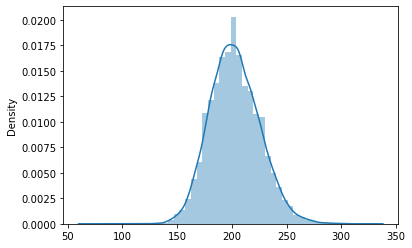

In [32]:
sns.distplot(x=games.total_points, bins=50)


## This dataframe gives us team info
#### Really only useful for referencing TEAM_ID, not sure if there's anything useful for our model

In [33]:
teams = pd.read_csv('teams.csv')
teams.head()

LEAGUE_ID     TEAM_ID  MIN_YEAR  MAX_YEAR ABBREVIATION   NICKNAME  \
0          0  1610612737      1949      2019          ATL      Hawks   
1          0  1610612738      1946      2019          BOS    Celtics   
2          0  1610612740      2002      2019          NOP   Pelicans   
3          0  1610612741      1966      2019          CHI      Bulls   
4          0  1610612742      1980      2019          DAL  Mavericks   

   YEARFOUNDED         CITY                     ARENA  ARENACAPACITY  \
0         1949      Atlanta          State Farm Arena        18729.0   
1         1946       Boston                 TD Garden        18624.0   
2         2002  New Orleans      Smoothie King Center            NaN   
3         1966      Chicago             United Center        21711.0   
4         1980       Dallas  American Airlines Center        19200.0   

             OWNER  GENERALMANAGER      HEADCOACH DLEAGUEAFFILIATION  
0     Tony Ressler  Travis Schlenk   Lloyd Pierce      Erie Bayhawks  
1    Wyc Grousbeck     Danny Ainge   Brad Stevens    Maine Red Claws  
2       Tom Benson  Trajan Langdon   Alvin Gentry       No Affiliate  
3  Jerry Reinsdorf      Gar Forman     Jim Boylen   Windy City Bulls  
4       Mark Cuban   Donnie Nelson  Rick Carlisle      Texas Legends

In [34]:
teams.shape

(30, 14)

In [35]:
teams.columns

Index(['LEAGUE_ID', 'TEAM_ID', 'MIN_YEAR', 'MAX_YEAR', 'ABBREVIATION',
       'NICKNAME', 'YEARFOUNDED', 'CITY', 'ARENA', 'ARENACAPACITY', 'OWNER',
       'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION'],
      dtype='object')

## This dataframe gives us the Team_ID and Player_ID for each player by Season
#### Again, probably not useful for the model other than to reference PLAYER_ID for readability

In [36]:
players = pd.read_csv('players.csv')
players.head()

PLAYER_NAME     TEAM_ID  PLAYER_ID  SEASON
0     Royce O'Neale  1610612762    1626220    2019
1  Bojan Bogdanovic  1610612762     202711    2019
2       Rudy Gobert  1610612762     203497    2019
3  Donovan Mitchell  1610612762    1628378    2019
4       Mike Conley  1610612762     201144    2019

In [37]:
players.shape

(7228, 4)

In [38]:
players.columns

Index(['PLAYER_NAME', 'TEAM_ID', 'PLAYER_ID', 'SEASON'], dtype='object')

## This dataframe gives us team records by season
#### Could be useful but winning percentage can be determined from the 'games' dataset

In [39]:
ranking = pd.read_csv('ranking.csv')
ranking.head()

TEAM_ID  LEAGUE_ID  SEASON_ID STANDINGSDATE CONFERENCE         TEAM   G  \
0  1610612762          0      22020    2021-05-26       West         Utah  72   
1  1610612756          0      22020    2021-05-26       West      Phoenix  72   
2  1610612743          0      22020    2021-05-26       West       Denver  72   
3  1610612746          0      22020    2021-05-26       West  LA Clippers  72   
4  1610612742          0      22020    2021-05-26       West       Dallas  72   

    W   L  W_PCT HOME_RECORD ROAD_RECORD  RETURNTOPLAY  
0  52  20  0.722        31-5       21-15           NaN  
1  51  21  0.708        27-9       24-12           NaN  
2  47  25  0.653       25-11       22-14           NaN  
3  47  25  0.653       26-10       21-15           NaN  
4  42  30  0.583       21-15       21-15           NaN

In [40]:
ranking.shape

(193092, 13)

In [41]:
ranking.columns

Index(['TEAM_ID', 'LEAGUE_ID', 'SEASON_ID', 'STANDINGSDATE', 'CONFERENCE',
       'TEAM', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD',
       'RETURNTOPLAY'],
      dtype='object')

Reading in CSV to get the betting total

In [42]:
bets = pd.read_csv('nba_betting_totals.csv')
bets.head()

game_id        book_name  book_id     team_id   a_team_id  total1  total2  \
0  21100131  Pinnacle Sports      238  1610612740  1610612743   192.0   192.0   
1  21100131           5Dimes       19  1610612740  1610612743   192.0   192.0   
2  21100131        Bookmaker       93  1610612740  1610612743   192.0   192.0   
3  21100131        BetOnline     1096  1610612740  1610612743   191.5   191.5   
4  21100131           Bovada   999996  1610612740  1610612743   192.0   192.0   

   price1  price2  
0  -105.0  -105.0  
1  -105.0  -105.0  
2  -110.0  -110.0  
3  -110.0  -110.0  
4  -110.0  -110.0

In [43]:
bets.game_id.nunique()

14918

In [44]:
bets.book_name.value_counts()

5Dimes             14909
Pinnacle Sports    14899
Bookmaker          14866
Bovada             14542
Sportsbetting      13796
BetOnline          13796
JustBet            13688
Intertops          12235
YouWager            9947
Heritage            8708
Name: book_name, dtype: int64

In [45]:
bovada_bets = bets[bets.book_name=='Bovada']

In [46]:
bovada_bets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14542 entries, 4 to 131380
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   game_id    14542 non-null  int64  
 1   book_name  14542 non-null  object 
 2   book_id    14542 non-null  int64  
 3   team_id    14542 non-null  int64  
 4   a_team_id  14542 non-null  int64  
 5   total1     14542 non-null  float64
 6   total2     14542 non-null  float64
 7   price1     14542 non-null  float64
 8   price2     14542 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.1+ MB


In [47]:
bovada_bets

game_id book_name  book_id     team_id   a_team_id  total1  total2  \
4       21100131    Bovada   999996  1610612740  1610612743   192.0   192.0   
14      21100137    Bovada   999996  1610612760  1610612763   193.0   193.0   
24      21100148    Bovada   999996  1610612760  1610612740   184.0   184.0   
34      21100149    Bovada   999996  1610612745  1610612759   199.0   199.0   
44      21100152    Bovada   999996  1610612753  1610612757   185.0   185.0   
...          ...       ...      ...         ...         ...     ...     ...   
131340  41700212    Bovada   999996  1610612755  1610612738   207.0   207.0   
131350  41700233    Bovada   999996  1610612744  1610612740   233.0   233.0   
131360  41700213    Bovada   999996  1610612738  1610612755   207.0   207.0   
131370  41700234    Bovada   999996  1610612744  1610612740   231.0   231.0   
131380  41700215    Bovada   999996  1610612755  1610612738   206.0   206.0   

        price1  price2  
4       -110.0  -110.0  
14      -110.0  -110.0  
24      -105.0  -115.0  
34      -110.0  -110.0  
44      -115.0  -105.0  
...        ...     ...  
131340  -110.0  -110.0  
131350  -115.0  -105.0  
131360  -110.0  -110.0  
131370  -110.0  -110.0  
131380  -105.0  -115.0  

[14542 rows x 9 columns]

In [48]:
pd.set_option('display.max_rows', None)

In [49]:
bet_teams = pd.read_csv('nba_teams_all.csv')
bet_teams

league_id     team_id  min_year  max_year abbreviation
0           0  1610612737    1949.0    2018.0          ATL
1           0  1610612738    1946.0    2018.0          BOS
2           0  1610612739    1970.0    2018.0          CLE
3           0  1610612740    2002.0    2018.0          NOP
4           0  1610612741    1966.0    2018.0          CHI
5           0  1610612742    1980.0    2018.0          DAL
6           0  1610612743    1976.0    2018.0          DEN
7           0  1610612744    1946.0    2018.0          GSW
8           0  1610612745    1967.0    2018.0          HOU
9           0  1610612746    1970.0    2018.0          LAC
10          0  1610612747    1948.0    2018.0          LAL
11          0  1610612748    1988.0    2018.0          MIA
12          0  1610612749    1968.0    2018.0          MIL
13          0  1610612750    1989.0    2018.0          MIN
14          0  1610612751    1976.0    2018.0          BKN
15          0  1610612752    1946.0    2018.0          NYK
16          0  1610612753    1989.0    2018.0          ORL
17          0  1610616834       NaN       NaN          NaN
18          0  1610616833       NaN       NaN          NaN
19          0       12306       NaN       NaN          NaN
20          0       12303       NaN       NaN          NaN
21          0       12313       NaN       NaN          NaN
22          0       12316       NaN       NaN          NaN
23          0          45       NaN       NaN          NaN
24          0       12308       NaN       NaN          NaN
25          0       12304       NaN       NaN          NaN
26          0       12320       NaN       NaN          NaN
27          0       12315       NaN       NaN          NaN
28          0          94       NaN       NaN          NaN
29          0       12321       NaN       NaN          NaN
30          0       12324       NaN       NaN          NaN
31          0          93       NaN       NaN          NaN
32          0          41       NaN       NaN          NaN
33          0       12325       NaN       NaN          NaN
34          0       12323       NaN       NaN          NaN
35          0       12330       NaN       NaN          NaN
36          0       15015       NaN       NaN          NaN
37          0       15018       NaN       NaN          NaN
38          0       12329       NaN       NaN          NaN
39          0       15016       NaN       NaN          NaN
40          0       15017       NaN       NaN          NaN
41          0  1610612754    1976.0    2018.0          IND
42          0  1610612755    1949.0    2018.0          PHI
43          0  1610612756    1968.0    2018.0          PHX
44          0  1610612757    1970.0    2018.0          POR
45          0  1610612758    1948.0    2018.0          SAC
46          0  1610612759    1976.0    2018.0          SAS
47          0  1610612760    1967.0    2018.0          OKC
48          0  1610612761    1995.0    2018.0          TOR
49          0  1610612762    1974.0    2018.0          UTA
50          0  1610612763    1995.0    2018.0          MEM
51          0  1610612764    1961.0    2018.0          WAS
52          0  1610612765    1948.0    2018.0          DET
53          0  1610612766    1988.0    2018.0          CHA
54          0  1610610029    1948.0    1948.0          NaN
55          0  1610610025    1946.0    1949.0          NaN
56          0  1610610034    1946.0    1949.0          NaN
57          0  1610610036    1946.0    1950.0          NaN
58          0  1610610024    1947.0    1954.0          NaN
59          0  1610610031    1946.0    1946.0          NaN
60          0  1610610027    1949.0    1949.0          NaN
61          0  1610610030    1949.0    1952.0          NaN
62          0  1610610033    1949.0    1949.0          NaN
63          0  1610610037    1949.0    1949.0          NaN
64          0  1610610023    1949.0    1949.0          NaN
65          0  1610610026    1946.0    1946.0          NaN
66          0  1610610028    1946.0    1946.0      

In [50]:
len(bet_teams[bet_teams.abbreviation.isnull()==False])

30

In [51]:
bet_teams.dropna(inplace=True)
bet_teams

league_id     team_id  min_year  max_year abbreviation
0           0  1610612737    1949.0    2018.0          ATL
1           0  1610612738    1946.0    2018.0          BOS
2           0  1610612739    1970.0    2018.0          CLE
3           0  1610612740    2002.0    2018.0          NOP
4           0  1610612741    1966.0    2018.0          CHI
5           0  1610612742    1980.0    2018.0          DAL
6           0  1610612743    1976.0    2018.0          DEN
7           0  1610612744    1946.0    2018.0          GSW
8           0  1610612745    1967.0    2018.0          HOU
9           0  1610612746    1970.0    2018.0          LAC
10          0  1610612747    1948.0    2018.0          LAL
11          0  1610612748    1988.0    2018.0          MIA
12          0  1610612749    1968.0    2018.0          MIL
13          0  1610612750    1989.0    2018.0          MIN
14          0  1610612751    1976.0    2018.0          BKN
15          0  1610612752    1946.0    2018.0          NYK
16          0  1610612753    1989.0    2018.0          ORL
41          0  1610612754    1976.0    2018.0          IND
42          0  1610612755    1949.0    2018.0          PHI
43          0  1610612756    1968.0    2018.0          PHX
44          0  1610612757    1970.0    2018.0          POR
45          0  1610612758    1948.0    2018.0          SAC
46          0  1610612759    1976.0    2018.0          SAS
47          0  1610612760    1967.0    2018.0          OKC
48          0  1610612761    1995.0    2018.0          TOR
49          0  1610612762    1974.0    2018.0          UTA
50          0  1610612763    1995.0    2018.0          MEM
51          0  1610612764    1961.0    2018.0          WAS
52          0  1610612765    1948.0    2018.0          DET
53          0  1610612766    1988.0    2018.0          CHA

In [52]:
bovada_bets.team_id.replace({1610612737:"ATL", 1610612738:"BOS", 1610612739:"CLE", \
                             1610612740:"NOP",1610612741:"CHI", 1610612742:"DAL",\
                            1610612743:"DEN", 1610612744:"GSW", 1610612745:"HOU",\
                            1610612746:"LAC", 1610612747:"LAL", 1610612748:"MIA",\
                            1610612749:"MIL", 1610612750:"MIN", 1610612751:"BKN",\
                            1610612752:"NYK", 1610612753:"ORL", 1610612754:"IND",\
                            1610612755:"PHI", 1610612756:"PHX", 1610612757:"POR",\
                            1610612758:"SAC", 1610612759:"SAS", 1610612760:"OKC",\
                            1610612761:"TOR", 1610612762:"UTA", 1610612763:"MEM",\
                            1610612764:"WAS", 1610612765:"DET", 1610612766:"CHA"}, inplace=True)

In [53]:
bovada_bets.a_team_id.replace({1610612737:"ATL", 1610612738:"BOS", 1610612739:"CLE", \
                             1610612740:"NOP",1610612741:"CHI", 1610612742:"DAL",\
                            1610612743:"DEN", 1610612744:"GSW", 1610612745:"HOU",\
                            1610612746:"LAC", 1610612747:"LAL", 1610612748:"MIA",\
                            1610612749:"MIL", 1610612750:"MIN", 1610612751:"BKN",\
                            1610612752:"NYK", 1610612753:"ORL", 1610612754:"IND",\
                            1610612755:"PHI", 1610612756:"PHX", 1610612757:"POR",\
                            1610612758:"SAC", 1610612759:"SAS", 1610612760:"OKC",\
                            1610612761:"TOR", 1610612762:"UTA", 1610612763:"MEM",\
                            1610612764:"WAS", 1610612765:"DET", 1610612766:"CHA"}, inplace=True)

In [54]:
bovada_bets

game_id book_name  book_id team_id a_team_id  total1  total2  price1  \
4       21100131    Bovada   999996     NOP       DEN   192.0   192.0  -110.0   
14      21100137    Bovada   999996     OKC       MEM   193.0   193.0  -110.0   
24      21100148    Bovada   999996     OKC       NOP   184.0   184.0  -105.0   
34      21100149    Bovada   999996     HOU       SAS   199.0   199.0  -110.0   
44      21100152    Bovada   999996     ORL       POR   185.0   185.0  -115.0   
54      21100153    Bovada   999996     MIA       LAC   204.0   204.0  -110.0   
64      21100160    Bovada   999996     WAS       PHI   185.0   185.0  -115.0   
74      21100164    Bovada   999996     SAC       HOU   200.0   200.0  -110.0   
84      21100165    Bovada   999996     MIL       DAL   185.0   185.0  -110.0   
95      21100168    Bovada   999996     MIA       DEN   210.0   210.0  -110.0   
105     21100173    Bovada   999996     BOS       IND   181.0   181.0  -105.0   
115     21100175    Bovada   999996     NOP       MEM   175.0   175.0  -110.0   
134     21100200    Bovada   999996     DET       HOU   189.0   189.0  -110.0   
144     21100203    Bovada   999996     OKC       WAS   197.0   197.0  -115.0   
154     21100204    Bovada   999996     SAS       ORL   192.0   192.0  -110.0   
164     21100206    Bovada   999996     GSW       BKN   197.0   197.0  -110.0   
174     21100209    Bovada   999996     MEM       NOP   177.0   177.0  -110.0   
184     21100210    Bovada   999996     DET       MIN   186.0   186.0  -110.0   
194     21100212    Bovada   999996     DAL       LAC   182.0   182.0  -115.0   
204     21100216    Bovada   999996     POR       TOR   180.0   180.0  -115.0   
214     21100219    Bovada   999996     PHX       BOS   183.0   183.0  -110.0   
224     21100220    Bovada   999996     MIL       NYK   189.0   189.0  -110.0   
234     21100226    Bovada   999996     IND       GSW   194.0   194.0  -110.0   
244     21100227    Bovada   999996     CLE       ATL   187.0   187.0  -115.0   
254     21100228    Bovada   999996     DEN       NYK   206.0   206.0  -115.0   
264     21100229    Bovada   999996     PHI       MIA   193.0   193.0  -115.0   
274     21100232    Bovada   999996     CHA       CHI   183.0   183.0  -115.0   
284     21100236    Bovada   999996     MIN       UTA   191.0   191.0  -110.0   
294     21100258    Bovada   999996     CHA       WAS   192.0   192.0  -110.0   
304     21100259    Bovada   999996     NYK       CLE   196.0   196.0  -110.0   
314     21100265    Bovada   999996     ATL       SAS   189.0   189.0  -110.0   
323     21100270    Bovada   999996     BOS       ORL   175.0   175.0  -105.0   
333     21100271    Bovada   999996     MEM       LAC   193.0   193.0  -105.0   
343     21100275    Bovada   999996     BKN       CLE   191.0   191.0  -110.0   
353     21100278    Bovada   999996     ORL       NOP   176.0   176.0  -115.0   
363     21100280    Bovada   999996     SAS       MIN   196.0   196.0  -105.0   
373     21100283    Bovada   999996     PHX       POR   193.0   193.0  -115.0   
383     21100285    Bovada   999996     DET       PHI   177.0   177.0  -110.0   
393     21100287    Bovada   999996     NYK       HOU   192.0   192.0  -115.0   
403     21100303    Bovada   999996     SAS       MEM   190.0   190.0  -110.0   
413     21100306    Bovada   999996     DAL       PHX   184.0   184.0  -115.0   
423     21100334    Bovada   999996     CLE       ORL   189.0   189.0  -115.0   
433     21100335    Bovada   999996     MIN       BKN   199.0   199.0  -110.0   
443     21100342    Bovada   999996     LAC       WAS   201.0   201.0  -110.0   
453     21100347    Bovada   999996     DAL       CLE   191.0   191.0  -110.0   
463     21100348    Bovada   999996     HOU       MIN   204.0   204.0  -110.0   
473     21100350    Bovada   999996     OKC       SAS   195.0   195.0  -105.0   
483     21100354    Bovada   999996     DEN       POR   201.0   201.0  -110.0   
493     21100361    Bovada   999996     

In [55]:
bovada_bets.team_id.value_counts()

SAS    533
BOS    528
CLE    525
MIA    513
GSW    504
LAL    500
ATL    497
CHI    495
HOU    492
ORL    492
TOR    491
IND    490
MEM    488
DAL    486
UTA    482
LAC    480
WAS    478
BKN    477
POR    477
PHI    476
MIL    475
PHX    475
NOP    473
DET    473
DEN    472
NYK    467
CHA    467
MIN    455
SAC    450
OKC    431
Name: team_id, dtype: int64

## What's the goal of our model?:

##### To predict total points scored by the Home and Away teams, compare that to the Vegas prediciton

## What variables do we need to feed the machine:
- Vegas O/U spread 

- Home Team FG pct
- Home Team FT pct
- Home Team 3PT pct
- Home Team Def rating (?)
- Home Team Rebounding
- Home Team Lineup

- Away Team FG pct
- Away Team FT pct
- Away Team 3pt pct
- Away Team Def rating (?)
- Away Team Rebounding
- Away Team Lineup

#### Target

- Total points scored